<a href="https://colab.research.google.com/github/Agrover112/CC1702-ML-Lab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf

In [3]:
fm=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=fm.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape  

(10000, 28, 28)

In [6]:
x_train[0]   

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

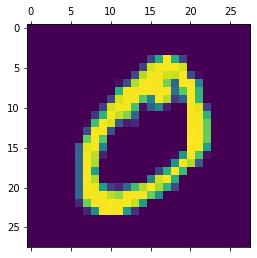

In [7]:
plt.matshow(x_train[1])

In [8]:
#normalize the data
x_train=x_train/255
x_test=x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

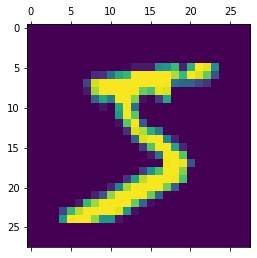

In [10]:
plt.matshow(x_train[0])

In [11]:
#build CNN
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Test SGDM and ADAM

# ADAM

Epoch=3

In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=3)
model.evaluate(x_test,y_test)

Epoch 1/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.1111 - accuracy: 0.9657
Epoch 2/3
1875/1875 [==============================] - 158s 85ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 3/3
313/313 [==============================] - 7s 22ms/step - loss: 0.0366 - accuracy: 0.9877


[0.0365968681871891, 0.9876999855041504]

Epoch=5

In [15]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 2/5
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 3/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 4/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 5/5
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0058 - accuracy: 0.9980


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0563 - accuracy: 0.9896


[0.05630024895071983, 0.9896000027656555]

Epoch=8

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0063 - accuracy: 0.9981
Epoch 2/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0040 - accuracy: 0.9987
Epoch 3/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 4/8
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 5/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 6/8
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 7/8
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0039 - accuracy: 0.9989
Epoch 8/8
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0032 - accuracy: 0.9991


In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0592 - accuracy: 0.9909


[0.05919671803712845, 0.9908999800682068]

#SGDM

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = tf.keras.optimizers.SGD(momentum=0.9),metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1838 - accuracy: 0.9437
Epoch 2/3
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 3/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0291 - accuracy: 0.9907


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0343 - accuracy: 0.9891


[0.03432917222380638, 0.9890999794006348]

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 2/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 3/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 4/5
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 5/5
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0049 - accuracy: 0.9985


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0331 - accuracy: 0.9909


[0.033147115260362625, 0.9908999800682068]

In [ ]:
model.fit(x_train,y_train,epochs=8)

Epoch 1/8
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0038 - accuracy: 0.9989
Epoch 2/8
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 3/8
1875/1875 [==============================] - 154s 82ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 4/8
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0015 - accuracy: 0.9995
Epoch 5/8
1875/1875 [==============================] - 154s 82ms/step - loss: 9.7228e-04 - accuracy: 0.9997
Epoch 6/8
1875/1875 [==============================] - 154s 82ms/step - loss: 2.7383e-04 - accuracy: 0.9999
Epoch 7/8
1875/1875 [==============================] - 154s 82ms/step - loss: 1.7923e-04 - accuracy: 0.9999
Epoch 8/8
1875/1875 [==============================] - 153s 82ms/step - loss: 3.0682e-04 - accuracy: 0.9999


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0409 - accuracy: 0.9912


[0.04086056351661682, 0.9911999702453613]

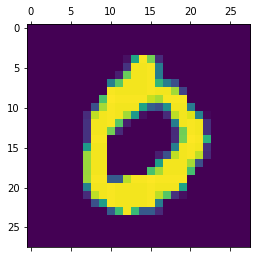

In [ ]:
plt.matshow(x_test[3])

In [ ]:
yp=model.predict(x_test)